## **Restaurant Reviews Sentiment Analysis.**

### **Importing the necessary libraries for reading the tsv data file**

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
#Reading the tsv file.
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t' , quoting=3)

**:Displaying the count of liked and disliked reviews.**

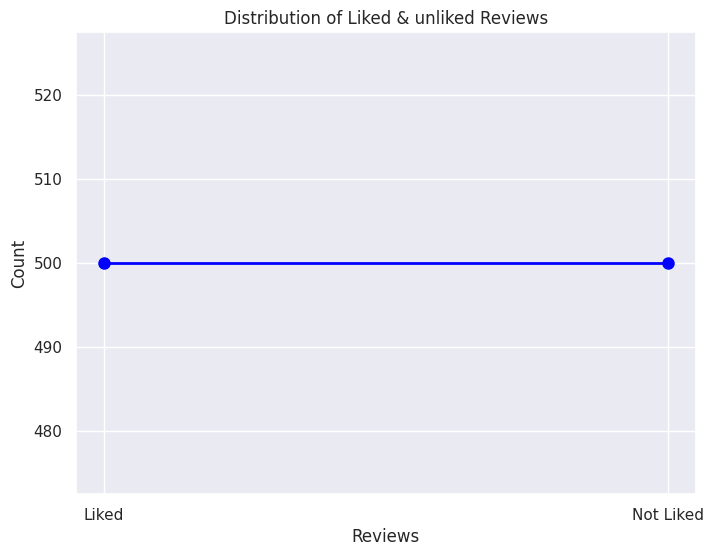

In [116]:
liked_count = data[data['Liked'] == 1].shape[0]
not_liked_count = data[data['Liked'] == 0].shape[0]

# Here we are Creating a line plot to display the review count.
plt.figure(figsize=(8, 6))

plt.plot(['Liked', 'Not Liked'], [liked_count, not_liked_count], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

# Here we add the title and the labels of the line-graph.
plt.title('Distribution of Liked & unliked Reviews')
plt.xlabel('Reviews')
plt.ylabel('Count')

plt.show()#It will display the line graph for us.

As you can see the number liked and disliked in the Restaurant review is 50-50.

In [117]:
# Here we are going to count the liked and disliked reviews.
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, good_reviews_count)

(500, 500)

**Let us see some features of Restaurant_Reviews dataset.**

In [118]:
data.shape

(1000, 2)

In [119]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [120]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [121]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


As you can see the number of reviews starts from 0 and go upto 999. Total review = 1000

**Importing Natural Language Toolkit(nltk)**

In [122]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])#It replaces any character that is not a letter.
    review = review.lower()#This converts all the text to lowercase
    review = review.split()#This splits the text into a list of words
    all_stopwords = stopwords.words('english')#This creates a list of stopwords from the NLTK corpus.
    all_stopwords.remove('not')
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

**Text Data Preprocessing and Vectorization for Sentiment Analysis**

In [124]:
corpus[:1500]
# This slice operation is used to select the first 1500 reviews from the corpus.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

### **Training and testing split up**

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [126]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

## 1.Navie bayes Model

**(a) Bernoulli Naive Bayes Classifier.**

In [127]:
# Bernoulli Naive Bayes Classifier.
# Here we are importing the necessary library's.
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# It is the initialization of the Bernoulli NB Classifier.
bnb = BernoulliNB()

# Here we are Performing Stratified K-Fold Cross-Validation.
kfold = StratifiedKFold(n_splits=12)
cv_bnb = cross_val_score(bnb, X_train, y_train, cv=kfold)

# Here we are Printing Cross-Validation Results.
print(cv_bnb)
print(cv_bnb.mean()*100)

# Training the Classifier.
bnb.fit(X_train, y_train)

# Training Accuracy
train_accuracy = bnb.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Prediction on Test Data.
y_pred_bnb = bnb.predict(X_test)

# test accuracy.
test_accuracy = metrics.accuracy_score(y_pred_bnb, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculating the Accuracy of Bernoulli NB Classifier.
accuracy_bnb = metrics.accuracy_score(y_pred_bnb, y_test)
print('The accuracy of the Bernoulli Naive Bayes is', accuracy_bnb*100)

# Confusion Matrix.
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print(cm_bnb)

# Classification Report.
classification_report_bnb = classification_report(y_test, y_pred_bnb)
print(classification_report_bnb)

[0.71641791 0.79104478 0.73134328 0.76119403 0.7761194  0.71641791
 0.80597015 0.82089552 0.72727273 0.75757576 0.87878788 0.83333333]
77.63643901703604
Training Accuracy: 93.62%
Test Accuracy: 77.50%
The accuracy of the Bernoulli Naive Bayes is 77.5
[[73 24]
 [21 82]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        97
           1       0.77      0.80      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



**(b) Multinomial Naive Bayes Classifier.**

In [128]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Initializing the Multinomial Naive Bayes Classifier.
mnb = MultinomialNB()

# Here we are Performing Stratified K-Fold Cross-Validation.
cv_mnb = cross_val_score(mnb, X_train, y_train, cv=kfold)

# Printing the Cross-Validation Results.
print(cv_mnb)
print(cv_mnb.mean()*100)

# Training the Classifier.
mnb.fit(X_train, y_train)

# Training Accuracy
train_accuracy = mnb.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Prediction on Test Data.
y_pred_mnb = mnb.predict(X_test)

# test accuracy.
test_accuracy = metrics.accuracy_score(y_pred_mnb, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculate Accuracy of Multinomial NB Classifier.
accuracy_mnb = metrics.accuracy_score(y_pred_mnb, y_test)
print('The accuracy of the Multinomial Naive Bayes is', accuracy_mnb*100)

# Confusion Matrix.
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print(cm_mnb)

# Classification Report.
classification_report_mnb = classification_report(y_test, y_pred_mnb)
print(classification_report_mnb)

[0.76119403 0.79104478 0.74626866 0.74626866 0.79104478 0.73134328
 0.80597015 0.80597015 0.77272727 0.77272727 0.87878788 0.84848485]
78.7652645861601
Training Accuracy: 94.00%
Test Accuracy: 77.50%
The accuracy of the Multinomial Naive Bayes is 77.5
[[74 23]
 [22 81]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.78      0.79      0.78       103

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



**(c) Complement Naive Bayes Classifier.**

In [129]:
# Complement Naive Bayes Classifier
from sklearn.naive_bayes import ComplementNB

# Initialize Complement Naive Bayes Classifier
cnb = ComplementNB()

# Performing Stratified K-Fold Cross-Validation
cv_cnb = cross_val_score(cnb, X_train, y_train, cv=kfold)

# Printing Cross-Validation Results
print(cv_cnb)
print(cv_cnb.mean()*100)

# Training the Classifier
cnb.fit(X_train, y_train)

# Training Accuracy
train_accuracy = cnb.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Prediction on Test Data
y_pred_cnb = cnb.predict(X_test)

test_accuracy = metrics.accuracy_score(y_pred_cnb, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculate Accuracy of Complement Naive Bayes Classifier.
accuracy_cnb = metrics.accuracy_score(y_pred_cnb, y_test)
print('The accuracy of the Complement Naive Bayes is', accuracy_cnb*100)

# Confusion Matrix
cm_cnb = confusion_matrix(y_test, y_pred_cnb)
print(cm_cnb)

# Classification Report
classification_report_cnb = classification_report(y_test, y_pred_cnb)
print(classification_report_cnb)

[0.76119403 0.79104478 0.74626866 0.74626866 0.79104478 0.73134328
 0.80597015 0.80597015 0.77272727 0.77272727 0.87878788 0.84848485]
78.7652645861601
Training Accuracy: 94.00%
Test Accuracy: 78.00%
The accuracy of the Complement Naive Bayes is 78.0
[[74 23]
 [21 82]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        97
           1       0.78      0.80      0.79       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



### **2.Logistic Regression.**

In [130]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
lr = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear', class_weight='balanced')
cv_lr = cross_val_score(lr, X_train_scaled, y_train, cv=kfold)

# Print Cross-Validation Results
print(cv_lr)
print(cv_lr.mean()*100)

# Train the Classifier
lr.fit(X_train_scaled, y_train)

# Training Accuracy
train_accuracy = lr.score(X_train_scaled, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Predict on Test Data
y_pred_lr = lr.predict(X_test_scaled)

# test accuracy.
test_accuracy = metrics.accuracy_score(y_pred_lr, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculate Accuracy of Logistic Regression Classifier.
accuracy_lr = metrics.accuracy_score(y_pred_lr, y_test)
print('The accuracy of Logistic Regression is', accuracy_lr*100)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Classification Report
classification_report_lr = classification_report(y_test, y_pred_lr)
print(classification_report_lr)

[0.70149254 0.7761194  0.71641791 0.70149254 0.74626866 0.79104478
 0.85074627 0.82089552 0.74242424 0.74242424 0.78787879 0.8030303 ]
76.50195989748228
Training Accuracy: 99.25%
Test Accuracy: 80.00%
The accuracy of Logistic Regression is 80.0
[[78 19]
 [21 82]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        97
           1       0.81      0.80      0.80       103

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



### **3.Decision Tree Classifier.**

In [131]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initializing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0, max_depth=10)

# Performing Cross-Validation
cv_dt = cross_val_score(dt_classifier, X_train, y_train, cv=kfold)

# Printing Cross-Validation Results
print(cv_dt)
print(cv_dt.mean()*100)

# Training the Classifier
dt_classifier.fit(X_train, y_train)

# Training Accuracy
train_accuracy = dt_classifier.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Prediction on Test Data
y_pred_dt = dt_classifier.predict(X_test)

# Test Accuracy
test_accuracy = metrics.accuracy_score(y_pred_dt, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculate Accuracy of Decision Tree Classifier.
accuracy_dt = metrics.accuracy_score(y_pred_dt, y_test)
print('The accuracy of the Decision Tree Classifier is', accuracy_dt*100)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Classification Report
classification_report_dt = classification_report(y_test, y_pred_dt)
print(classification_report_dt)

[0.70149254 0.67164179 0.71641791 0.76119403 0.74626866 0.74626866
 0.74626866 0.67164179 0.68181818 0.72727273 0.78787879 0.8030303 ]
73.00995024875623
Training Accuracy: 77.25%
Test Accuracy: 68.00%
The accuracy of the Decision Tree Classifier is 68.0
[[93  4]
 [60 43]]
              precision    recall  f1-score   support

           0       0.61      0.96      0.74        97
           1       0.91      0.42      0.57       103

    accuracy                           0.68       200
   macro avg       0.76      0.69      0.66       200
weighted avg       0.77      0.68      0.66       200



In [132]:
# Improved decision tree.
from sklearn.tree import DecisionTreeClassifier

# Here we made a tuned hyperparameters for the decision tree.
dt_classifier = DecisionTreeClassifier(random_state=0, max_depth=15, min_samples_split=5, min_samples_leaf=4)

# Here we evaluating the Cross-Validation.
cv_dt = cross_val_score(dt_classifier, X_train, y_train, cv=kfold)
print(cv_dt)
print(cv_dt.mean()*100)

# Here we are training the Classifier.
dt_classifier.fit(X_train, y_train)

# Training Accuracy
train_accuracy = dt_classifier.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Here we are making the Prediction on Test Data.
y_pred_dt = dt_classifier.predict(X_test)

# Test Accuracy
test_accuracy = metrics.accuracy_score(y_pred_dt, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculating the Accuracy.
accuracy_idt = metrics.accuracy_score(y_pred_dt, y_test)
print('The accuracy of the Decision Tree Classifier is', accuracy_idt*100)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Classification Report.
classification_report_dt = classification_report(y_test, y_pred_dt)
print(classification_report_dt)

[0.70149254 0.73134328 0.73134328 0.82089552 0.76119403 0.79104478
 0.7761194  0.71641791 0.8030303  0.75757576 0.77272727 0.8030303 ]
76.38511985526911
Training Accuracy: 78.25%
Test Accuracy: 72.00%
The accuracy of the Decision Tree Classifier is 72.0
[[94  3]
 [53 50]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77        97
           1       0.94      0.49      0.64       103

    accuracy                           0.72       200
   macro avg       0.79      0.73      0.71       200
weighted avg       0.80      0.72      0.70       200



As you can see the accuracy is drastically increased from 68 to 72.

### **4.Support Vector Classifier.**

In [133]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC

# Initializing SVC Classifier
svc_classifier = SVC(kernel='linear', C=1.0, random_state=0)

# Evaluation of Cross-Validation
cv_svc = cross_val_score(svc_classifier, X_train, y_train, cv=kfold)
print(cv_svc)
print(cv_svc.mean()*100)

# Training the Classifier
svc_classifier.fit(X_train, y_train)

# Training Accuracy
train_accuracy = svc_classifier.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Prediction on Test Data
y_pred_svc = svc_classifier.predict(X_test)

# Test Accuracy
test_accuracy = metrics.accuracy_score(y_pred_svc, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculate Accuracy of Support Vector Classifier.
accuracy_svc = metrics.accuracy_score(y_pred_svc, y_test)
print('The accuracy of the Support Vector Classifier is', accuracy_svc*100)

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

# Classification Report
classification_report_svc = classification_report(y_test, y_pred_svc)
print(classification_report_svc)

[0.7761194  0.82089552 0.74626866 0.79104478 0.7761194  0.76119403
 0.82089552 0.88059701 0.75757576 0.72727273 0.83333333 0.74242424]
78.61450324136891
Training Accuracy: 97.88%
Test Accuracy: 79.00%
The accuracy of the Support Vector Classifier is 79.0
[[79 18]
 [24 79]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        97
           1       0.81      0.77      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



### **5.Random Forest Classifier.**

In [134]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Evaluation of Cross-Validation
cv_rf = cross_val_score(rf_classifier, X_train, y_train, cv=kfold)
print(cv_rf)
print(cv_rf.mean()*100)

# Training the Classifier
rf_classifier.fit(X_train, y_train)

# Training Accuracy
train_accuracy = rf_classifier.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Prediction on Test Data
y_pred_rf = rf_classifier.predict(X_test)

# Test Accuracy
test_accuracy = metrics.accuracy_score(y_pred_rf, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Calculate Accuracy of Random Forest Classifier.
accuracy_rf = metrics.accuracy_score(y_pred_rf, y_test)
print('The accuracy of the Random Forest Classifier is', accuracy_rf*100)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Classification Report
classification_report_rf = classification_report(y_test, y_pred_rf)
print(classification_report_rf)


[0.7761194  0.82089552 0.73134328 0.80597015 0.76119403 0.7761194
 0.82089552 0.7761194  0.83333333 0.77272727 0.84848485 0.77272727]
79.13274536408863
Training Accuracy: 99.62%
Test Accuracy: 77.50%
The accuracy of the Random Forest Classifier is 77.5
[[91  6]
 [39 64]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        97
           1       0.91      0.62      0.74       103

    accuracy                           0.78       200
   macro avg       0.81      0.78      0.77       200
weighted avg       0.81      0.78      0.77       200



In [135]:
# Here we are going to print the used algorithms in a order based on its accuracy.
classifiers_accuracy = [
    ('Bernoulli Naive Bayes', accuracy_bnb),
    ('Multinomial Naive Bayes', accuracy_mnb),
    ('Complement Naive Bayes', accuracy_cnb),
    ('Logistic Regression', accuracy_lr),
    ('Decision Tree', accuracy_dt),
    ('Improved Decision Tree', accuracy_idt),
    ('Support Vector Classifier (SVC)', accuracy_svc),
    ('Random Forest Classifier', accuracy_rf)
]

# Sort the list based on accuracy in descending order.
classifiers_accuracy.sort(key=lambda x: x[1], reverse=True)

# Get the best classifier and its accuracy.
best_classifier, best_accuracy = classifiers_accuracy[0]

# Print the classifiers in order of accuracy.
for classifier, accuracy in classifiers_accuracy:
    print(f'{classifier}: {accuracy*100:.2f}%')

print(f'\nThe {best_classifier} algorithm is best for the Restaurant Reviews dataset.')


Logistic Regression: 80.00%
Support Vector Classifier (SVC): 79.00%
Complement Naive Bayes: 78.00%
Bernoulli Naive Bayes: 77.50%
Multinomial Naive Bayes: 77.50%
Random Forest Classifier: 77.50%
Improved Decision Tree: 72.00%
Decision Tree: 68.00%

The Logistic Regression algorithm is best for the Restaurant Reviews dataset.
